In [11]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Admin\Downloads\porfolio\dataset\LA_listings.csv"
df_raw= pd.read_csv(file_path)
print('Data shape:')
print(df.shape)
print('\n')
df_raw.info()

Data shape:
(45031, 79)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45031 entries, 0 to 45030
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            45031 non-null  int64  
 1   listing_url                                   45031 non-null  object 
 2   scrape_id                                     45031 non-null  int64  
 3   last_scraped                                  45031 non-null  object 
 4   source                                        45031 non-null  object 
 5   name                                          45030 non-null  object 
 6   description                                   43998 non-null  object 
 7   neighborhood_overview                         21333 non-null  object 
 8   picture_url                                   45031 non-null  object 
 9   host_id                            

In [12]:
# Define the columns to keep
core_columns = [
    'id', 'host_id', 'host_is_superhost',
    'neighbourhood_cleansed', 'latitude', 'longitude',
    'property_type', 'room_type', 'accommodates',
    'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
    'availability_365', 'number_of_reviews', 'reviews_per_month',
    'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_location', 'review_scores_value',
    'estimated_revenue_l365d', 'estimated_occupancy_l365d'
]

# Filter the dataframe to only those columns
df = df_raw[core_columns].copy()

# Show the shape and first few rows
print(f"Filtered dataset shape: {df.shape}")
df.head()

Filtered dataset shape: (45031, 23)


,id,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,...,maximum_nights,availability_365,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,estimated_revenue_l365d,estimated_occupancy_l365d
0,75212,343761,f,Lakewood,33.846500,-118.082440,Private room in townhouse,Private room,2,1.0,...,28,330,77,0.46,4.84,4.91,4.89,4.83,2730.0,42
1,76561,403838,t,View Park-Windsor Hills,33.985220,-118.359420,Entire guesthouse,Entire home/apt,3,0.0,...,14,136,902,5.30,4.83,4.68,4.70,4.79,27795.0,255
2,79502,428171,t,Silver Lake,34.082859,-118.278755,Entire vacation home,Entire home/apt,2,1.0,...,175,360,300,1.78,4.82,4.89,4.94,4.73,12720.0,120
3,79832,28569,f,Hollywood Hills,34.128010,-118.319190,Entire home,Entire home/apt,2,1.0,...,730,60,483,2.84,4.90,4.77,4.93,4.91,0.0,0
4,80714,436647,f,Mid-Wilshire,34.057980,-118.355410,Entire rental unit,Entire home/apt,1,1.0,...,60,337,197,1.16,4.95,4.96,4.95,4.88,27795.0,255


In [20]:
# Cleaning Price

# Covert string price to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Check conversion
print(df['price'].describe())

# Treat Outliers
# Get 1st and 99th percentiles
p1 = df['price'].quantile(0.01)
p99 = df['price'].quantile(0.99)

# Cap
df['price_capped'] = df['price'].clip(lower=p1, upper=p99)

# Compare before vs after
print("\nAfter Capping:")
print(df['price_capped'].describe())


count    35867.000000
mean       285.896618
std        862.523598
min          9.000000
25%         92.000000
50%        150.000000
75%        258.000000
max      99999.000000
Name: price, dtype: float64

After Capping:
count    35867.000000
mean       254.375136
std        354.001897
min         32.000000
25%         92.000000
50%        150.000000
75%        258.000000
max       2500.000000
Name: price_capped, dtype: float64


In [21]:
# Check missing values

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

review_scores_value          12666
review_scores_location       12665
review_scores_cleanliness    12656
review_scores_rating         12648
reviews_per_month            12648
beds                          9223
price                         9164
estimated_revenue_l365d       9164
price_capped                  9164
bedrooms                      2994
host_is_superhost             1518
dtype: int64


In [22]:
# Treat missing values in review columns group

# Create a flag column (T/F)
df['has_reviews'] = df['review_scores_rating'].notnull()

# Replace missing values in review score columns with 0
review_cols = [
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_value'
]
df[review_cols] = df[review_cols].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

print(df['has_reviews'].value_counts())
df[review_cols + ['has_reviews']].sample(5)

has_reviews
True     32383
False    12648
Name: count, dtype: int64


,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,has_reviews
21321,4.71,4.64,4.75,4.46,True
14155,5.00,4.00,5.00,4.00,True
33780,5.00,4.89,4.94,4.94,True
41810,5.00,5.00,5.00,5.00,True
1846,4.96,4.93,4.93,4.94,True


In [29]:
# Treat missing values in beds and bedrooms

# Check current missing
print("Missing bedrooms:", df['bedrooms'].isnull().sum())
print("Missing beds:", df['beds'].isnull().sum())

# Group-wise median imputation
df['bedrooms'] = df.groupby('room_type')['bedrooms'].transform(lambda x: x.fillna(x.median()))
df['beds'] = df.groupby('room_type')['beds'].transform(lambda x: x.fillna(x.median()))

# Fallback to global median if any remain
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

# Check again
print(df[['bedrooms', 'beds']].isnull().sum())


Missing bedrooms: 2994
Missing beds: 9223
bedrooms    0
beds        0
dtype: int64


In [30]:
# Drop missing values in price columns

# Separate incomplete listings
df_missing_price = df[df[['price', 'estimated_revenue_l365d']].isnull().any(axis=1)]

# Use clean set for core pricing & revenue analysis
df = df.dropna(subset=['price', 'estimated_revenue_l365d'])

# Check final row count
print("Remaining rows:", df.shape[0])

Remaining rows: 35867


In [31]:
# Treat missing values in host_is_superhost column

# Fill missing superhost status with 'f' (not superhost) - (assumption: no data = not a Superhost)
df['host_is_superhost'] = df['host_is_superhost'].fillna("f")

# Quick check
print(df['host_is_superhost'].value_counts())


host_is_superhost
f    21345
t    14522
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_39760\1545961617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_is_superhost'] = df['host_is_superhost'].fillna("f")


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35867 entries, 0 to 45030
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         35867 non-null  int64  
 1   host_id                    35867 non-null  int64  
 2   host_is_superhost          35867 non-null  object 
 3   neighbourhood_cleansed     35867 non-null  object 
 4   latitude                   35867 non-null  float64
 5   longitude                  35867 non-null  float64
 6   property_type              35867 non-null  object 
 7   room_type                  35867 non-null  object 
 8   accommodates               35867 non-null  int64  
 9   bedrooms                   35867 non-null  float64
 10  beds                       35867 non-null  float64
 11  price                      35867 non-null  float64
 12  minimum_nights             35867 non-null  int64  
 13  maximum_nights             35867 non-null  int64  


# EDA
🔍 Key EDA Questions
1. Pricing & Distribution

- What’s the distribution of nightly prices across room types?
- How do prices vary by number of bedrooms, beds, or accommodates?

2. Neighborhood Insights

- Which neighborhoods have the highest estimated revenue?
- What are the top 10 areas for bookings, and review scores?

3. Superhost Impact

- Do Superhosts earn more revenue than regular hosts?
- Is there a difference in review ratings?

4. Review Analysis

- Do listings with reviews tend to have higher revenue or availability?

5. Revenue Insights

- What factors correlate most with estimated_revenue_l365d?

## Pricing & Distribution
    # Understand the overall market
    # Identify pricing tiers
    # Spot differences by listing type or capacity

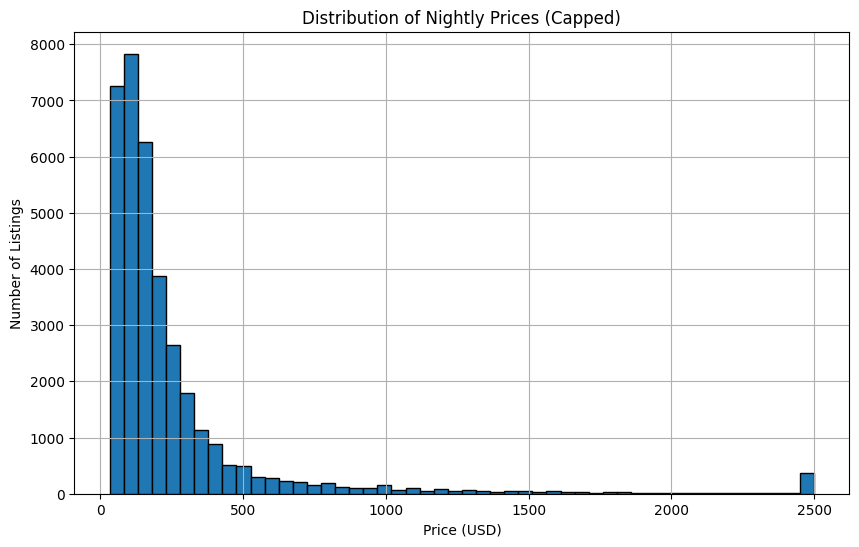

In [38]:
# Distribution by Price

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price_capped'], bins=50, edgecolor='black')
plt.title('Distribution of Nightly Prices (Capped)')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()


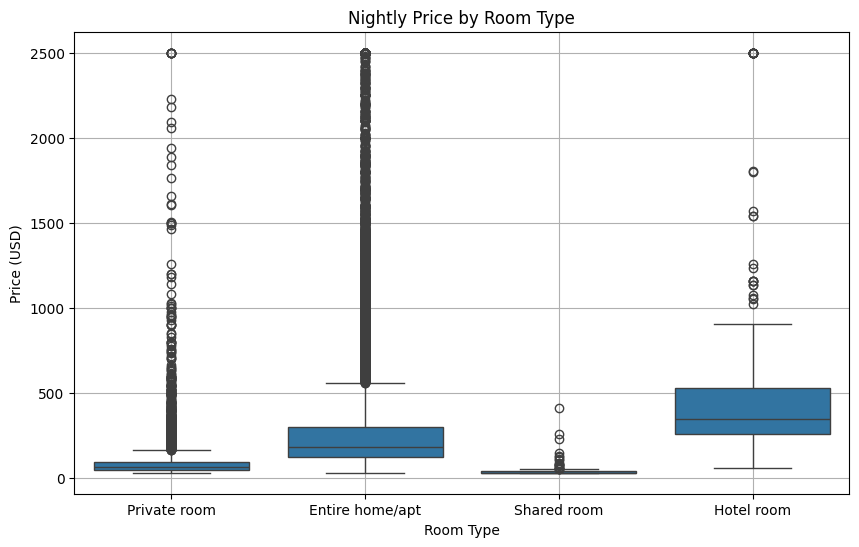

In [50]:
# Price by Room Type

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price_capped')
plt.title('Nightly Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()



#### Insight: Average & Median Price by Room Type

| Room Type         | Count  | Mean Price (USD) | Median Price (USD) |
|------------------|--------|------------------|---------------------|
| Hotel room       | 218    | $880.66          | $348.00             |
| Entire home/apt  | 27,164 | $336.55          | $182.00             |
| Private room     | 8,267  | $110.31          | $67.00              |
| Shared room      | 218    | $38.23           | $30.00              |

---

###  Key Observations:

- **Hotel rooms** have the highest average price but a much lower median, indicating **extreme price skew** from a few luxury listings.
- **Entire homes/apartments** dominate the platform (76% of listings) and offer significantly higher revenue potential than room rentals.
- **Private rooms** are positioned for budget-conscious solo travelers, while **shared rooms** are rare and represent the ultra-low-cost tier.

###  Business Insight:
Prioritize **entire home/apartment listings** for their balance of demand and pricing power. Consider filtering out or analyzing **hotel listings** separately due to price volatility.


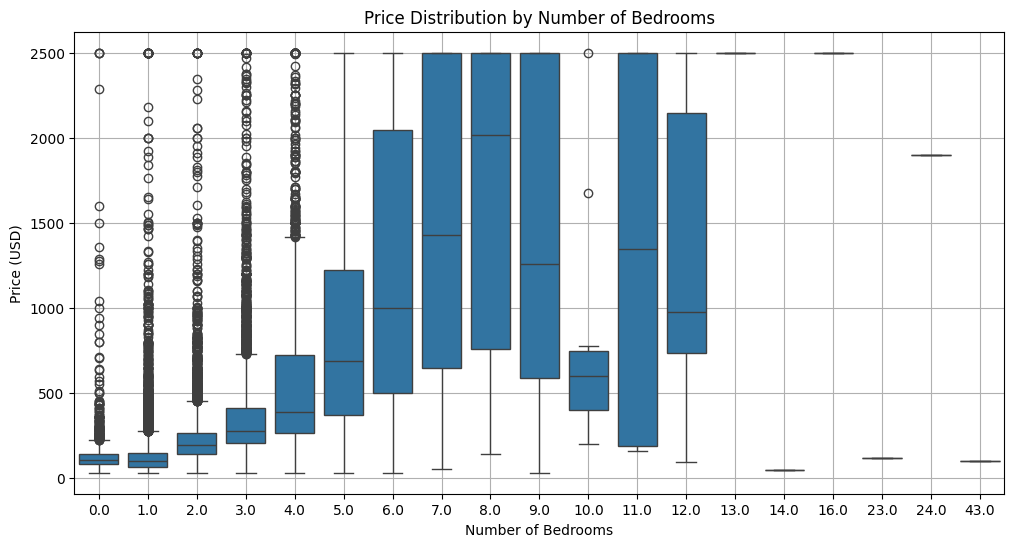

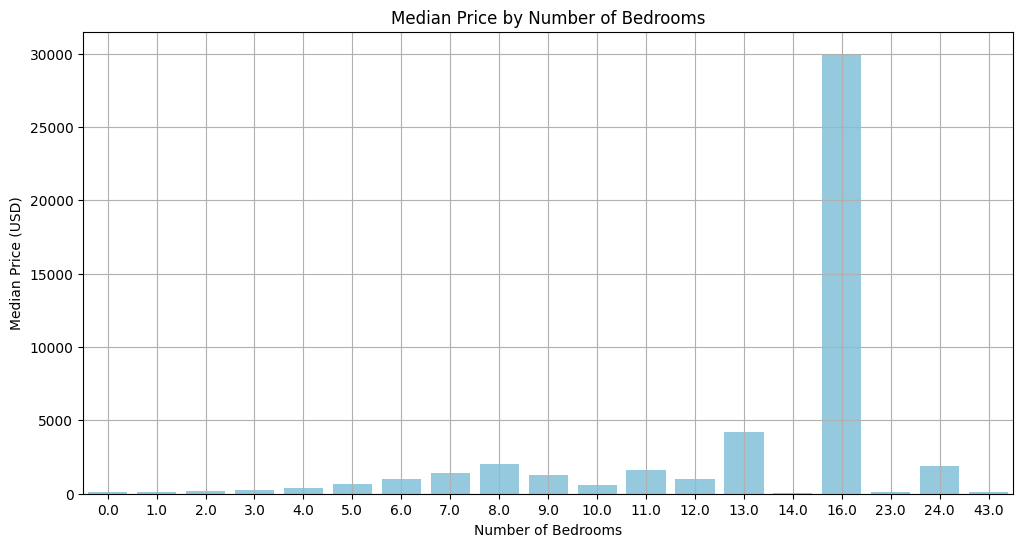

In [49]:
# Price by Number of Bedrooms

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bedrooms', y='price_capped')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

bedroom_price_summary = df.groupby('bedrooms')['price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=bedroom_price_summary, x='bedrooms', y='price', color='skyblue')
plt.title('Median Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price (USD)')
plt.grid(True)
plt.show()


#### Insight: Average & Median Price by Number of Bedrooms

| Bedrooms | Count  | Mean Price (USD) | Median Price (USD) |
|----------|--------|------------------|---------------------|
| 1.0      | 17,417 | $140.02          | $100.00             |
| 2.0      | 7,278  | $237.90          | $192.00             |
| 3.0      | 4,523  | $394.47          | $280.00             |
| 4.0      | 2,433  | $671.82          | $390.00             |
| 5.0      |   986  | $1,040.76        | $690.50             |
| 6.0      |   337  | $1,757.85        | $1,000.00           |
| 7.0+     |   ~220 | $2,000–$4,000+   | Highly skewed       |

> Note: Bedrooms above 7 are rare and often luxury or multi-unit listings, with very few data points (n < 50 in most cases).

---

###  Key Observations:

- **Strong price scaling** with each additional bedroom — median price roughly **doubles from 1 to 3 bedrooms**.
- From 3 to 5 bedrooms, the increase remains strong, suggesting listings scale well up to ~5 bedrooms.
- Beyond 6 bedrooms, price variance becomes extreme (e.g., \$30,000 listing with 16 bedrooms), indicating luxury or non-standard listings.

---

### Business Insight:
For investment properties, the **sweet spot is likely 2–4 bedrooms**, where:
- Prices are high enough to generate strong revenue
- Listings are still common enough to maintain booking volume
- You avoid the volatility and competition of the luxury tier


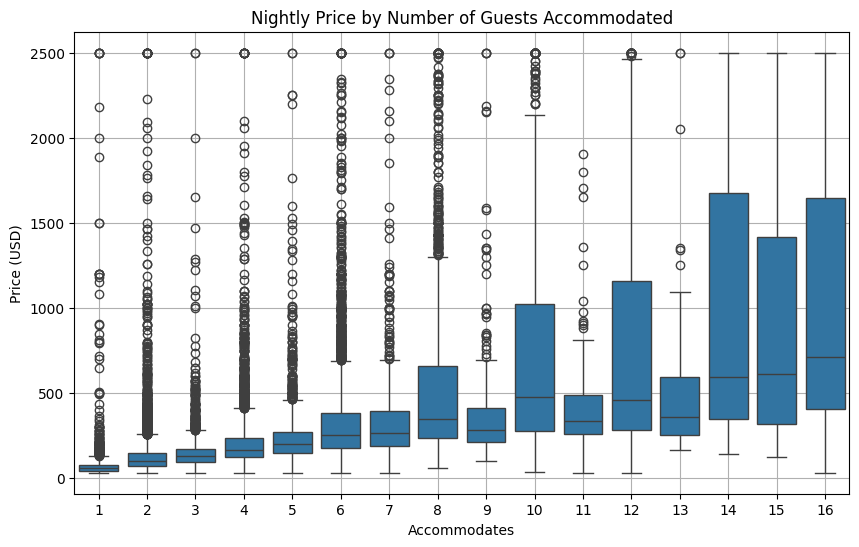

In [40]:
# Price vs Bedrooms or Accommodates

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='accommodates', y='price_capped')
plt.title('Nightly Price by Number of Guests Accommodated')
plt.xlabel('Accommodates')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


#### Insight: Average & Median Price by Number of Guests (`accommodates`)

| Guests Accommodated | Count  | Mean Price (USD) | Median Price (USD) |
|---------------------|--------|------------------|---------------------|
| 1                   | 3,023  | $116.50          | $60.00              |
| 2                   | 11,902 | $135.14          | $100.00             |
| 3                   | 2,734  | $151.97          | $128.00             |
| 4                   | 6,388  | $212.01          | $166.00             |
| 5                   | 1,751  | $244.97          | $198.00             |
| 6                   | 4,047  | $355.85          | $253.00             |
| 8                   | 2,419  | $624.01          | $345.00             |
| 10                  | 1,217  | $872.59          | $479.00             |
| 12                  |   565  | $1,059.39        | $462.00             |
| 14+                 | 500+   | $1,600–$1,800+   | Skewed              |

---

###  Key Observations:

- **Steady price scaling**: median price increases almost linearly from 1 to 6 guests.
- **Rapid jump at 8+ guests**: likely reflects transition into larger homes or luxury properties.
- **Price skew** increases sharply for listings that accommodate **10+ guests**, with the average rising faster than the median → heavy influence of high-end properties.

---

### Business Insight:
If you're targeting **group travel**, listings for **4 to 6 guests** strike a balance between:
- Higher nightly rates
- Strong demand volume
- Manageable price volatility

Above 8+ guests, consider it a **premium segment** — higher risk, potentially higher return, but less frequent bookings.


## Neighborhood Insights

### Key Observations:

- **Del Aire** and **Ridge Route** lead with exceptionally high average review counts, indicating **strong historical booking activity**.
- These are **not luxury-heavy neighborhoods**, suggesting high turnover and frequent, budget-friendly stays.
- Consistent review activity in **Rolling Hills** supports its earlier appearance in both revenue and rating rankings.

---

### Business Insight:
If aiming for **high booking volume**, these neighborhoods likely offer:
- Reliable demand
- Fast occupancy turnover
- Good opportunities for consistent cash flow, especially for 1–2 bedroom units.

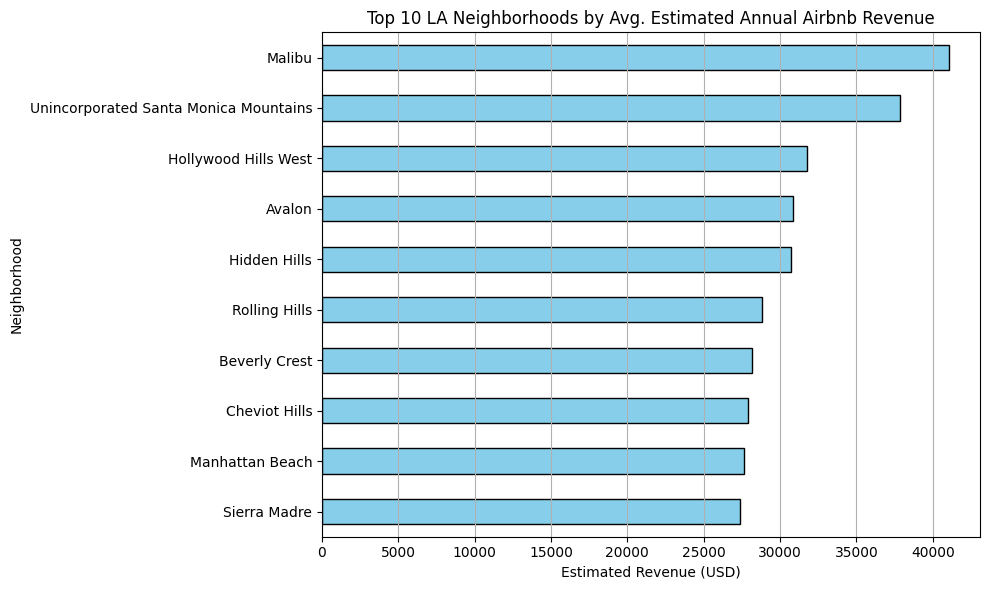

,count,mean,median
neighbourhood_cleansed,,,
Malibu,340,41039.90,19059.0
Unincorporated Santa Monica Mountains,148,37872.98,22416.0
Hollywood Hills West,577,31747.92,0.0
Avalon,221,30818.03,15630.0
Hidden Hills,14,30742.29,19533.0
Rolling Hills,5,28835.60,38250.0
Beverly Crest,196,28142.29,0.0
Cheviot Hills,13,27888.08,0.0
Manhattan Beach,365,27633.51,12324.0


In [59]:
# Top 10 Neighborhoods by Estimated Revenue
import matplotlib.pyplot as plt

# Prepare the data
top_revenue = df.groupby('neighbourhood_cleansed')['estimated_revenue_l365d'] \
    .agg(['count', 'mean', 'median']) \
    .round(2) \
    .sort_values('mean', ascending=False) \
    .head(10)

# Plot
plt.figure(figsize=(10, 6))
top_revenue['mean'].sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 LA Neighborhoods by Avg. Estimated Annual Airbnb Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Neighborhood')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Top 10 Neighborhoods by Estimated Revenue
df.groupby('neighbourhood_cleansed')['estimated_revenue_l365d'] \
  .agg(['count', 'mean', 'median']) \
  .round(2) \
  .sort_values('mean', ascending=False) \
  .head(10)


#### 💡 Insight: Top 10 Neighborhoods by Estimated Annual Revenue

| Neighborhood                          | Listings | Mean Revenue (USD) | Median Revenue (USD) |
|--------------------------------------|----------|---------------------|-----------------------|
| Malibu                               | 340      | $41,039.90          | $19,059.00            |
| Unincorporated Santa Monica Mountains| 148      | $37,872.98          | $22,416.00            |
| Hollywood Hills West                 | 577      | $31,747.92          | $0.00                 |
| Avalon                               | 221      | $30,818.03          | $15,630.00            |
| Hidden Hills                         | 14       | $30,742.29          | $19,533.00            |
| Rolling Hills                        | 5        | $28,835.60          | $38,250.00            |
| Beverly Crest                        | 196      | $28,142.29          | $0.00                 |
| Cheviot Hills                        | 13       | $27,888.08          | $0.00                 |
| Manhattan Beach                      | 365      | $27,633.51          | $12,324.00            |
| Sierra Madre                         | 19       | $27,398.37          | $30,324.00            |

---

### 📊 Key Observations:

- **Malibu** leads the market with both high average and strong listing volume → premium location + consistent performance.
- Several areas (e.g. **Hollywood Hills West**, **Beverly Crest**) have **$0 median revenue**, suggesting many luxury listings that are either new, inactive, or rarely booked.
- **Rolling Hills** and **Sierra Madre** have **very high medians** despite fewer listings — suggesting high revenue concentration in a small number of high-performing properties.

---

### 🧠 Business Insight:
If targeting revenue potential, **Malibu** and **Avalon** are strong bets due to their combination of high mean/median revenue and listing density.  
Be cautious with neighborhoods showing high averages but $0 medians — they may reflect **inactivity or volatility** in the luxury tier.


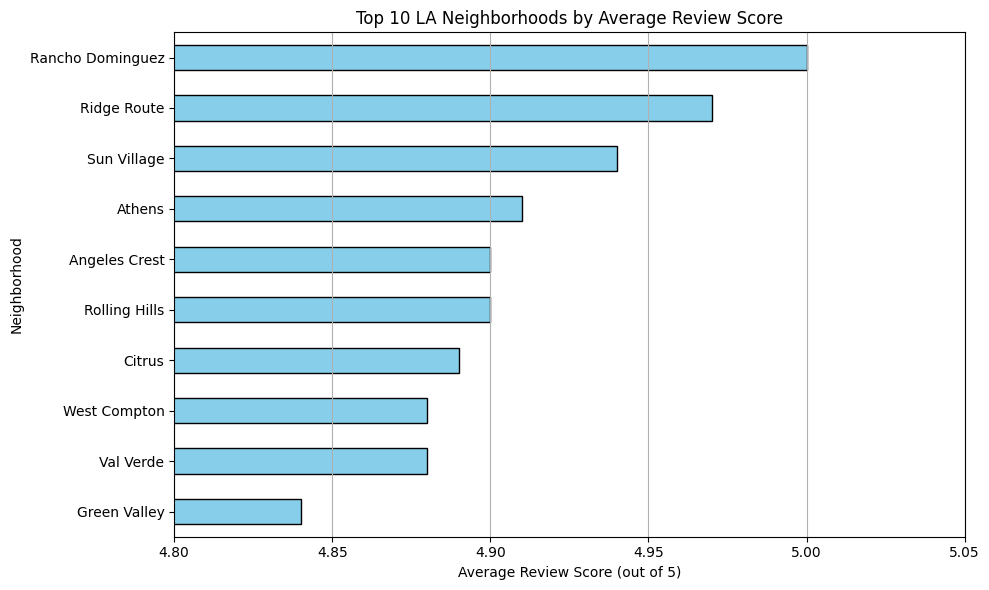

neighbourhood_cleansed
Rancho Dominguez    5.00
Ridge Route         4.97
Sun Village         4.94
Athens              4.91
Rolling Hills       4.90
Angeles Crest       4.90
Citrus              4.89
Val Verde           4.88
West Compton        4.88
Green Valley        4.84
Name: review_scores_rating, dtype: float64

In [62]:
# Top 10 by Review Score

# Prepare data
top_reviews = df.groupby('neighbourhood_cleansed')['review_scores_rating'] \
    .mean().round(2).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_reviews.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 LA Neighborhoods by Average Review Score')
plt.xlabel('Average Review Score (out of 5)')
plt.ylabel('Neighborhood')
plt.xlim(4.8, 5.05)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

df.groupby('neighbourhood_cleansed')['review_scores_rating'] \
  .mean().round(2).sort_values(ascending=False).head(10)



#### 💡 Insight: Top 10 LA Neighborhoods by Guest Review Score

| Neighborhood        | Avg. Rating (out of 5) |
|---------------------|------------------------|
| Rancho Dominguez    | 5.00                   |
| Ridge Route         | 4.97                   |
| Sun Village         | 4.94                   |
| Athens              | 4.91                   |
| Rolling Hills       | 4.90                   |
| Angeles Crest       | 4.90                   |
| Citrus              | 4.89                   |
| Val Verde           | 4.88                   |
| West Compton        | 4.88                   |
| Green Valley        | 4.84                   |

---

### 📊 Key Observations:

- Several **lesser-known or low-density neighborhoods** lead in guest satisfaction — possibly due to:
  - More attentive hosts
  - Lower booking volume = less wear on units
  - Niche or rural appeal with fewer complaints

- **Rancho Dominguez** and **Ridge Route** top the list with near-perfect scores (5.0+), indicating consistent guest delight.

---

### 🧠 Business Insight:
High ratings often reflect **host quality** and **guest experience** rather than location popularity.  
These areas could be strong for **high-review, lower-competition listings** — ideal for first-time hosts or boutique strategies.


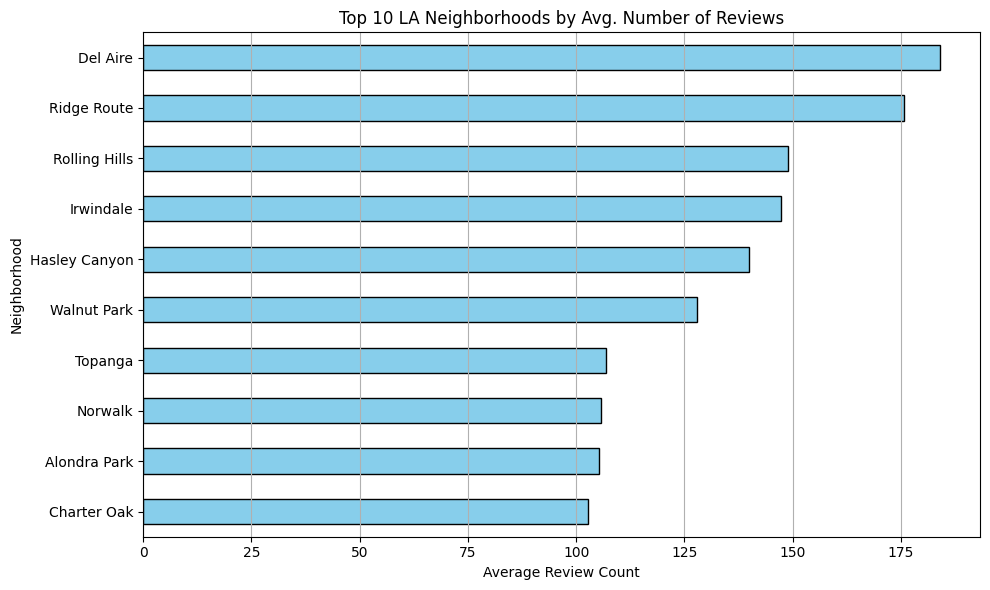

neighbourhood_cleansed
Del Aire         184.05
Ridge Route      175.80
Rolling Hills    149.00
Irwindale        147.38
Hasley Canyon    140.00
Walnut Park      128.00
Topanga          106.88
Norwalk          105.66
Alondra Park     105.37
Charter Oak      102.67
Name: number_of_reviews, dtype: float64

In [64]:
# Top 10 by Number of Reviews

# Prepare data
top_review_counts = df.groupby('neighbourhood_cleansed')['number_of_reviews'] \
    .mean().round(2).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_review_counts.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 LA Neighborhoods by Avg. Number of Reviews')
plt.xlabel('Average Review Count')
plt.ylabel('Neighborhood')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


df.groupby('neighbourhood_cleansed')['number_of_reviews'] \
  .mean().round(2).sort_values(ascending=False).head(10)


#### 💡 Insight: Top 10 LA Neighborhoods by Average Number of Reviews

| Neighborhood      | Avg. Number of Reviews |
|-------------------|------------------------|
| Del Aire          | 184.05                 |
| Ridge Route       | 175.80                 |
| Rolling Hills     | 149.00                 |
| Irwindale         | 147.38                 |
| Hasley Canyon     | 140.00                 |
| Walnut Park       | 128.00                 |
| Topanga           | 106.88                 |
| Norwalk           | 105.66                 |
| Alondra Park      | 105.37                 |
| Charter Oak       | 102.67                 |

---

### 📊 Key Observations:

- **Del Aire** and **Ridge Route** lead with exceptionally high average review counts, indicating **strong historical booking activity**.
- These are **not luxury-heavy neighborhoods**, suggesting high turnover and frequent, budget-friendly stays.
- Consistent review activity in **Rolling Hills** supports its earlier appearance in both revenue and rating rankings.

---

### 🧠 Business Insight:
If aiming for **high booking volume**, these neighborhoods likely offer:
- Reliable demand
- Fast occupancy turnover
- Good opportunities for consistent cash flow, especially for 1–2 bedroom units.


In [69]:


# Combined Metrics Table
# Step 1: Individual metrics by neighborhood
revenue = df.groupby('neighbourhood_cleansed')['estimated_revenue_l365d'].mean().round(2)
reviews = df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().round(2)
review_counts = df.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().round(2)

# Step 2: Combine into one table
combined = pd.concat([revenue, reviews, review_counts], axis=1)
combined.columns = ['avg_revenue', 'avg_review_score', 'avg_review_count']

# Step 3: Sort by avg_revenue
combined_sorted = combined.sort_values(by='avg_revenue', ascending=False)

# Step 4: Show top 10
combined_sorted.head(10)


,avg_revenue,avg_review_score,avg_review_count
neighbourhood_cleansed,,,
Malibu,41039.90,3.54,58.25
Unincorporated Santa Monica Mountains,37872.98,4.43,91.43
Hollywood Hills West,31747.92,2.76,31.81
Avalon,30818.03,4.41,54.57
Hidden Hills,30742.29,4.13,31.29
Rolling Hills,28835.60,4.90,149.00
Beverly Crest,28142.29,2.36,24.76
Cheviot Hills,27888.08,3.38,42.85
Manhattan Beach,27633.51,3.63,27.03


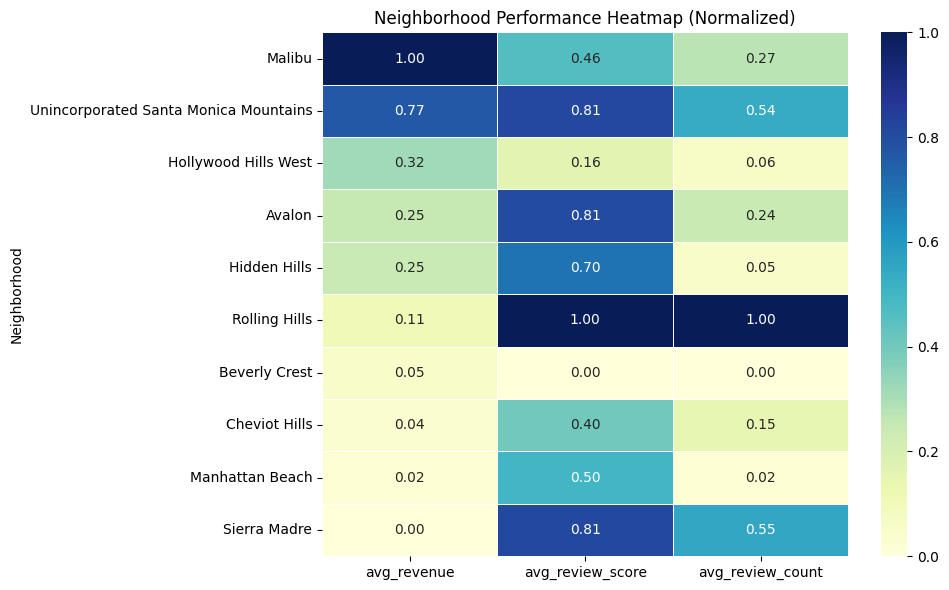

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reuse the combined summary you already created
top_neighborhoods = combined_sorted.head(10)  # Already sorted by avg_revenue

# Optional: Normalize values (z-score or min-max) to compare scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(top_neighborhoods),
    columns=top_neighborhoods.columns,
    index=top_neighborhoods.index
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title('Neighborhood Performance Heatmap (Normalized)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


#### 💡 Insight: Top 10 LA Neighborhoods by Revenue, Ratings & Booking Volume

| Neighborhood                          | Avg. Revenue (USD) | Avg. Review Score | Avg. Review Count |
|--------------------------------------|---------------------|-------------------|-------------------|
| Malibu                               | $41,039.90          | 3.54              | 58.25             |
| Unincorporated Santa Monica Mountains| $37,872.98          | 4.43              | 91.43             |
| Hollywood Hills West                 | $31,747.92          | 2.76              | 31.81             |
| Avalon                               | $30,818.03          | 4.41              | 54.57             |
| Hidden Hills                         | $30,742.29          | 4.13              | 31.29             |
| Rolling Hills                        | $28,835.60          | 4.90              | 149.00            |
| Beverly Crest                        | $28,142.29          | 2.36              | 24.76             |
| Cheviot Hills                        | $27,888.08          | 3.38              | 42.85             |
| Manhattan Beach                      | $27,633.51          | 3.63              | 27.03             |
| Sierra Madre                         | $27,398.37          | 4.42              | 93.26             |

---

### 📊 Key Takeaways:

- **Rolling Hills** stands out as a **top all-around performer**, with high revenue, high satisfaction (4.90), and high review count (149) — suggesting both premium quality and strong demand.
- **Malibu**, while #1 in revenue, has a surprisingly **low review score (3.54)** — may reflect service inconsistency or high guest expectations in luxury stays.
- **Hollywood Hills West** and **Beverly Crest** have strong revenue but **very low guest satisfaction (≤ 2.8)** → high risk, potentially luxury-focused properties that underdeliver.
- **Sierra Madre** and **Unincorporated Santa Monica Mountains** offer **balanced excellence** — high revenue, great scores, and many bookings.

---

### 🧠 Business Insight:
If  looking for **high-earning, reliable, and well-reviewed markets**, focus on:
- **Rolling Hills** (best balanced)
- **Sierra Madre**
- **Unincorporated Santa Monica Mountains**

Treat high-revenue but low-review-score areas (like **Hollywood Hills**) with caution — they may require service upgrades or better management to retain guests.


## Superhost Impact

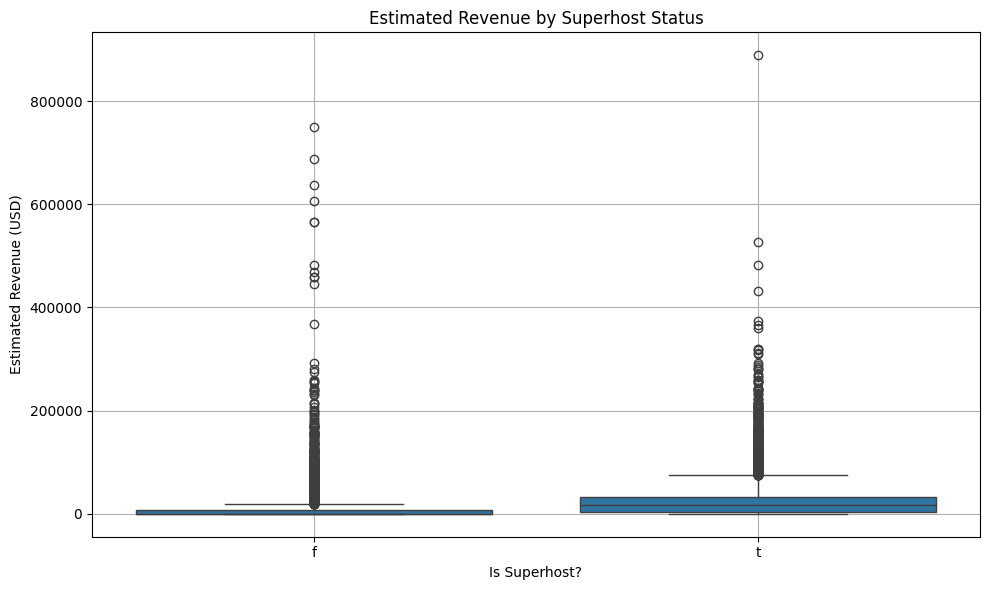

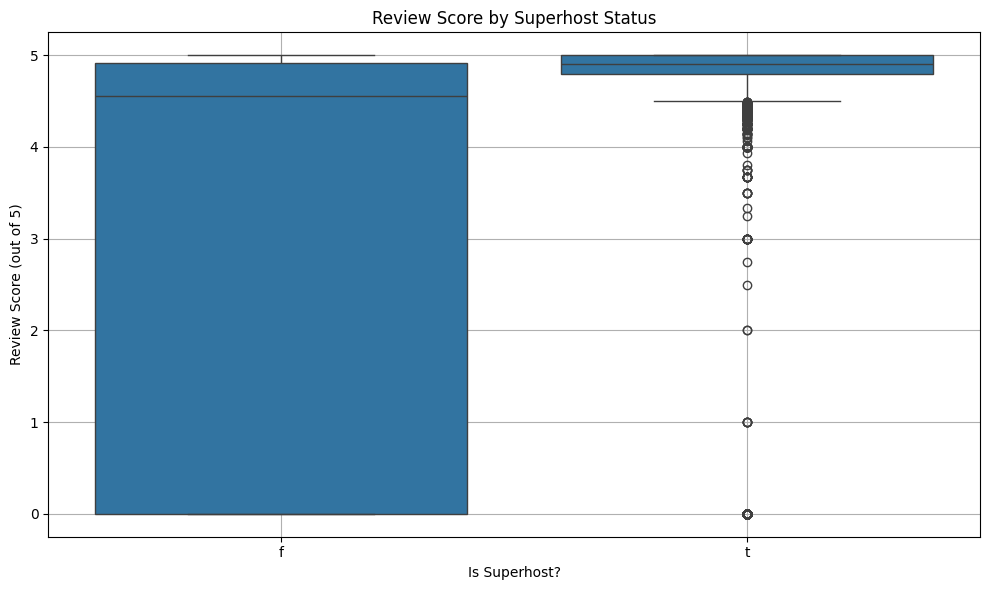

estimated_revenue_l365d                  \
                                     mean   median  count   
host_is_superhost                                           
f                                 7913.41      0.0  21345   
t                                23882.80  16089.0  14522   

                  review_scores_rating                
                                  mean median  count  
host_is_superhost                                     
f                                 2.94   4.56  21345  
t                                 4.38   4.91  14522

In [ ]:
# Summary Stats by Superhost Status


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='host_is_superhost', y='estimated_revenue_l365d')
plt.title('Estimated Revenue by Superhost Status')
plt.xlabel('Is Superhost?')
plt.ylabel('Estimated Revenue (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='host_is_superhost', y='review_scores_rating')
plt.title('Review Score by Superhost Status')
plt.xlabel('Is Superhost?')
plt.ylabel('Review Score (out of 5)')
plt.grid(True)
plt.tight_layout()
plt.show()


df.groupby('host_is_superhost')[['estimated_revenue_l365d', 'review_scores_rating']].agg(['mean', 'median', 'count']).round(2)



#### Insight: Superhost vs Non-Superhost Performance

| Host Type     | Avg. Revenue (USD) | Median Revenue (USD) | Avg. Review Score | Median Review Score | Listings |
|---------------|--------------------|-----------------------|-------------------|---------------------|----------|
| Non-Superhost | $7,913.41          | $0.00                 | 2.94              | 4.56                | 21,345   |
| Superhost     | $23,882.80         | $16,089.00            | 4.38              | 4.91                | 14,522   |

---

### Key Observations:

- **Superhosts outperform regular hosts across the board**, with ~3x average revenue and significantly higher guest ratings.
- The **median revenue of $0 for non-Superhosts** suggests that many listings are either **new, inactive, or poorly managed**.
- Superhosts maintain **nearly perfect median review scores (4.91)**, reflecting both experience and service quality.

---

### Business Insight:
 **achieving Superhost status should be a strategic priority**. It clearly drives more bookings, better guest experiences, and significantly higher revenue.


## Review Analysis

#### 💡 Insight: Do Listings With Reviews Earn More?

| Has Reviews | Avg. Revenue (USD) | Median Revenue | Avg. Availability | Median Availability | Count   |
|-------------|--------------------|----------------|--------------------|----------------------|---------|
| No          | $0.00              | $0.00          | 276.23 days        | 335.0 days           | 9,493   |
| Yes         | $19,554.77         | $10,800.00     | 222.65 days        | 242.0 days           | 26,374  |

---

### 📊 Key Observations:

- Listings **with reviews clearly earn more** — a median of $10,800/year vs $0 for those without.
- **High availability without reviews** likely means listings are either:
  - New and unbooked
  - Uncompetitive in quality or pricing
  - Poorly managed or inactive

---

### 🧠 Business Insight:
Encourage early reviews and visibility strategies — **getting the first few reviews** is critical to breaking out of the “zero-booking” trap.  
Review presence signals both **market validation and guest trust**, which translates directly into higher revenue.

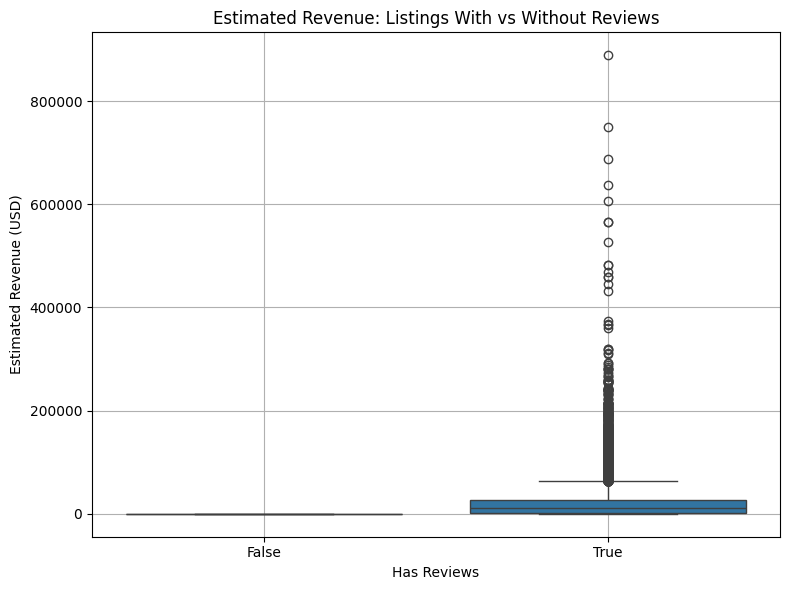

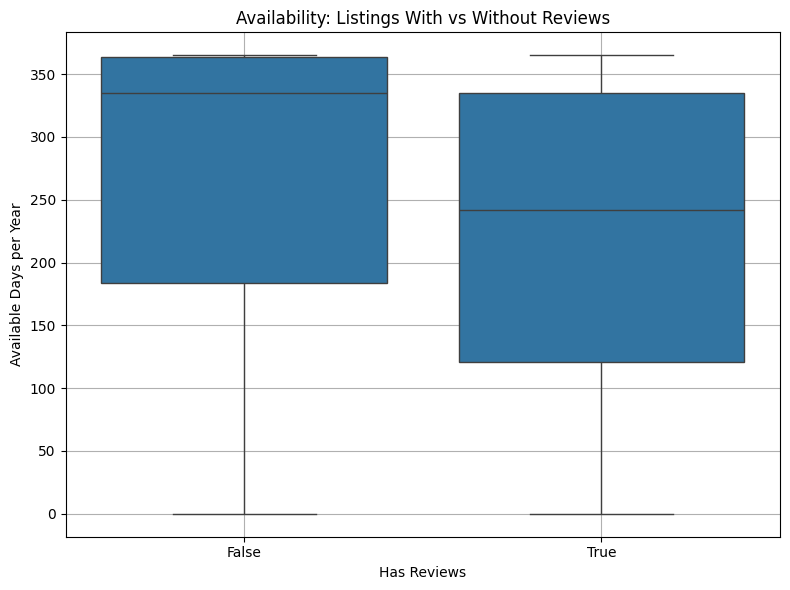

estimated_revenue_l365d                 availability_365         \
                               mean   median  count             mean median   
has_reviews                                                                   
False                          0.00      0.0   9493           276.23  335.0   
True                       19554.77  10800.0  26374           222.65  242.0   

                    
             count  
has_reviews         
False         9493  
True         26374

In [79]:
# Box Plot For revenue, availability with Reviews
# Revenue Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='has_reviews', y='estimated_revenue_l365d')
plt.title('Estimated Revenue: Listings With vs Without Reviews')
plt.xlabel('Has Reviews')
plt.ylabel('Estimated Revenue (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Availability Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='has_reviews', y='availability_365')
plt.title('Availability: Listings With vs Without Reviews')
plt.xlabel('Has Reviews')
plt.ylabel('Available Days per Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare Revenue & Availability by has_reviews
df.groupby('has_reviews')[['estimated_revenue_l365d', 'availability_365']].agg(['mean', 'median', 'count']).round(2)



## Revenue Insights
#### Insight: What Features Correlate Most with Revenue?

### 🔝 Top Drivers of Revenue:

| Feature                   | Correlation | Insight |
|---------------------------|-------------|---------|
| Occupancy Rate            | 0.600       | More booked days = more revenue |
| Reviews per Month         | 0.372       | Higher booking frequency drives revenue |
| Review Scores (Rating, Cleanliness, Location, Value) | ~0.33 | Guest satisfaction directly influences success |
| Accommodates / Beds / Bedrooms | ~0.23–0.27 | Larger listings tend to earn more |

### ❌ Weak or Negative Predictors:

- **Price** has only a weak positive correlation (0.099) — suggesting that simply charging more doesn't guarantee higher revenue.
- **Availability** and **minimum_nights** have mild **negative correlations**, implying that overly available or restrictive listings may be underbooked.

---

### 🧠 Business Insight:
Airbnb revenue is **not just about price** — it’s a combination of:
- **Guest satisfaction (review scores)**
- **Activity (reviews per month)**
- **Occupancy**
- **Listing size/capacity**
- **Optimal pricing** likely falls in the $150-$400 range, where both occupancy and pricing remain relatively strong.
- High-priced listings must be paired with **exceptional value or uniqueness** to stay competitive.
- Hosts should consider A/B testing different price points to **maximize revenue**, not just bookings or price alone.
- Targeting the **\$200–\$500/night range** is likely to yield the most stable revenue performance
- **High-priced luxury listings** may perform well, but come with more volatility and risk
- Optimize for **occupancy, reviews, and guest value perception** — not just nightly price

estimated_revenue_l365d      1.000
estimated_occupancy_l365d    0.600
reviews_per_month            0.372
review_scores_rating         0.330
review_scores_cleanliness    0.329
review_scores_location       0.327
review_scores_value          0.327
accommodates                 0.266
number_of_reviews            0.249
beds                         0.235
bedrooms                     0.231
price_capped                 0.213
price                        0.099
maximum_nights              -0.028
latitude                    -0.054
host_id                     -0.071
longitude                   -0.078
id                          -0.096
minimum_nights              -0.100
availability_365            -0.103
Name: estimated_revenue_l365d, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_39760\2478655983.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="Blues_d")


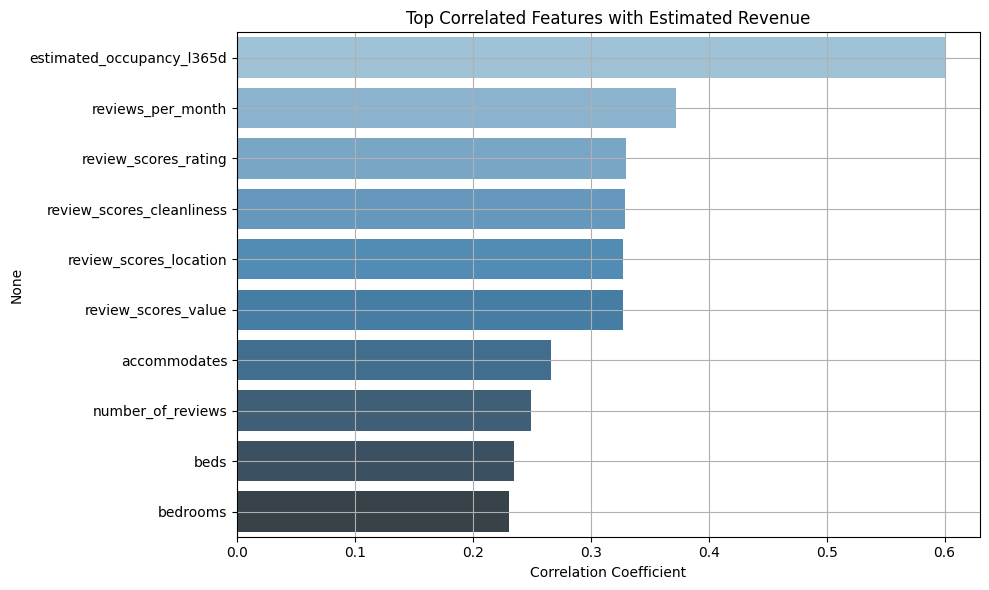

In [81]:
# Compute Correlation with Revenue

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).copy()

# Compute correlation with revenue
revenue_corr = numeric_cols.corr()['estimated_revenue_l365d'].sort_values(ascending=False).round(3)

# Display top correlations
print(revenue_corr)


# Bar plot of top positive correlations
top_corr = revenue_corr.drop('estimated_revenue_l365d').sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="Blues_d")
plt.title('Top Correlated Features with Estimated Revenue')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()



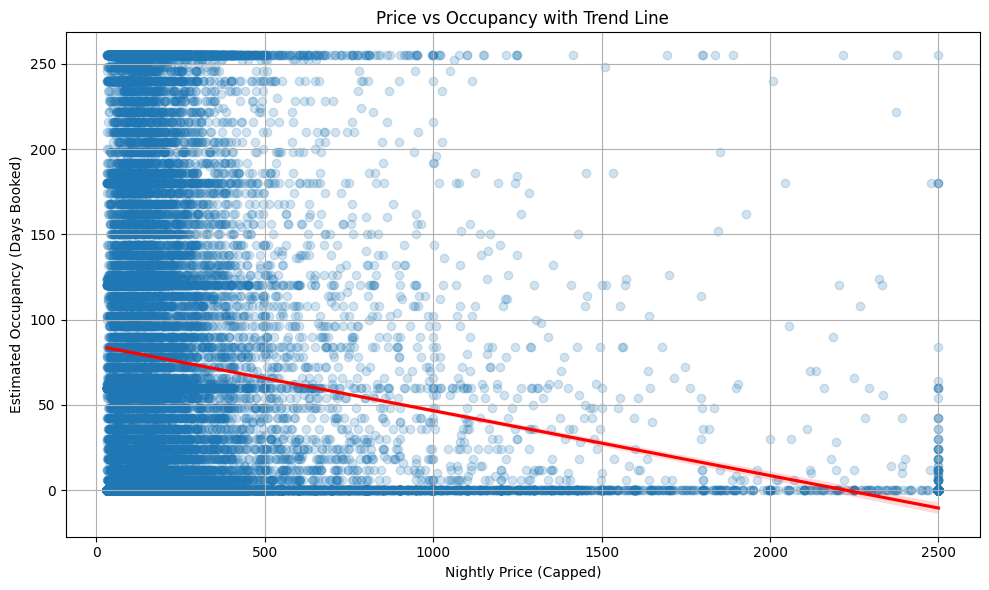

In [84]:
# price vs occupancy tradeoffs

# Scatter Plot — Price vs. Occupancy

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='price_capped', y='estimated_occupancy_l365d', scatter_kws={'alpha':0.2}, line_kws={"color": "red"})
plt.title('Price vs Occupancy with Trend Line')
plt.xlabel('Nightly Price (Capped)')
plt.ylabel('Estimated Occupancy (Days Booked)')
plt.grid(True)
plt.tight_layout()
plt.show()



#### Insight: Price vs. Occupancy Tradeoff

---

### Key Observations:

- The trend line clearly shows a **negative relationship**: as nightly price increases, estimated occupancy declines.
- Most listings under $500/night show a wide range of booking volume — indicating high competition in this core market segment.
- Listings priced above $1,000 tend to have **lower occupancy**, suggesting they are **luxury/niche** and appeal to a smaller audience.


C:\Users\Admin\AppData\Local\Temp\ipykernel_39760\1346438417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue_proxy'] = df['price_capped'] * df['estimated_occupancy_l365d']
C:\Users\Admin\AppData\Local\Temp\ipykernel_39760\1346438417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bin'] = pd.cut(df['price_capped'], bins=bins)
C:\Users\Admin\AppData\Local\Temp\ipykernel_39760\1346438417.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True i

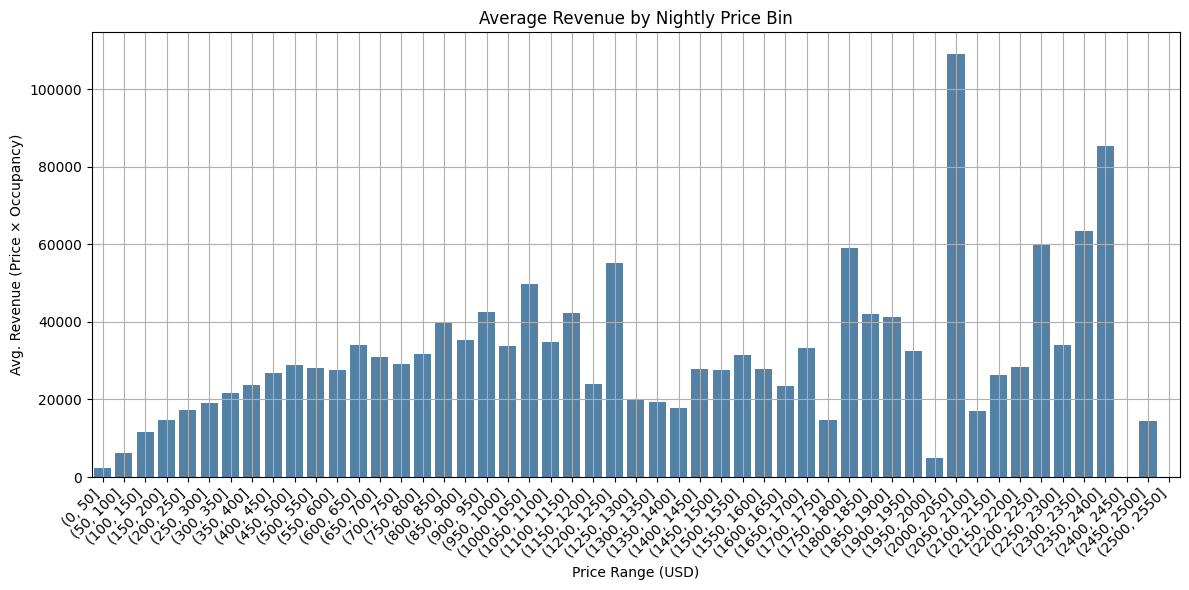

In [85]:
# sweet spot for price × occupancy that maximizes total revenue
df['revenue_proxy'] = df['price_capped'] * df['estimated_occupancy_l365d']

# Create bins of price_capped every $50
bins = range(0, 2600, 50)  # From $0 to $2500
df['price_bin'] = pd.cut(df['price_capped'], bins=bins)

revenue_by_bin = df.groupby('price_bin')['revenue_proxy'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_bin, x='price_bin', y='revenue_proxy', color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Revenue by Nightly Price Bin')
plt.xlabel('Price Range (USD)')
plt.ylabel('Avg. Revenue (Price × Occupancy)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Final Project Summary: Airbnb Market Analysis (Los Angeles)

# Airbnb Market Analysis: Los Angeles

### Objective:
Analyze Airbnb listings in Los Angeles to uncover revenue drivers, neighborhood opportunities, and performance patterns for investment and pricing strategy.

---

## Key Findings

### 1. Revenue Drivers
- **Occupancy rate** (correlation = 0.60) is the strongest predictor of revenue.
- Listings with higher **guest review scores**, more **frequent reviews**, and **larger capacity** (beds, accommodates) consistently earn more.
- **Nightly price alone** has a weak correlation with revenue (0.10), reinforcing that **value and volume** matter more than pricing high.

---

### 2. Neighborhood Insights
- **Malibu** and **Avalon** have the **highest average revenue**, but with large variation in guest satisfaction.
- **Rolling Hills** and **Sierra Madre** offer **balanced performance** across revenue, reviews, and booking volume.
- High-revenue areas with **poor review scores** (e.g., Beverly Crest, Hollywood Hills) may indicate underdelivering luxury listings.

---

### 3. Superhost Advantage
- **Superhosts earn 3× more** on average (\$23.9k vs \$7.9k).
- Superhosts also have **much higher review scores** (4.38 vs 2.94).
- Median revenue for non-Superhosts is **\$0**, suggesting many are inactive or struggling.

---

### 4. Review Impact
- Listings **with reviews earn significantly more** (median \$10.8k vs \$0).
- **No reviews + high availability** = high likelihood of underperformance or invisibility.
- Gaining initial reviews is **critical to breaking out of the zero-booking trap**.

---

### 5. Pricing vs Occupancy Tradeoff
- There’s a **clear negative relationship**: higher price = lower occupancy.
- Listings under **\$500/night** strike the best balance between price and volume.
- **Luxury listings above \$1,800** can work — but are rare and volatile.

---

### 6. Revenue Sweet Spot
- Based on price × occupancy, the **strongest and most stable revenue occurs between \$200–\$500/night**.
- Listings above \$2,000 can spike in revenue but **only in niche, high-end segments**.

---

## Final Recommendations

- **For new or scaling hosts**: Focus on reaching Superhost status early and pricing in the \$200–\$500/night range with strong attention to cleanliness, guest communication, and reviews.
- **For investors**: Prioritize properties in **Rolling Hills**, **Sierra Madre**, and **Unincorporated Santa Monica Mountains** — neighborhoods with balanced revenue, satisfaction, and demand.
- **For pricing strategy**: Optimize not just price but **occupancy, guest experience, and visibility**. Avoid high availability with no reviews.

---

In [86]:
import os
downloads = os.path.join(os.path.expanduser("~"), "Downloads")
df.to_csv(os.path.join(downloads, 'airbnb_la_cleaned.csv'), index=False)
